In [11]:
import pandas as pd 
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import KMeans


In [12]:
data_frame = pd.read_csv('customerspends.csv')
print(data_frame.head())
data_frame.info()

   Customer  Apparel  Beauty and Healthcare
0         1    21.10                    0.7
1         2    15.23                    5.5
2         3     5.22                   18.6
3         4    31.10                    1.8
4         5     6.12                   21.5
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 3 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Customer               20 non-null     int64  
 1   Apparel                20 non-null     float64
 2   Beauty and Healthcare  20 non-null     float64
dtypes: float64(2), int64(1)
memory usage: 608.0 bytes


## Q1

Text(0, 0.5, 'Beauty and Healthcare Spending')

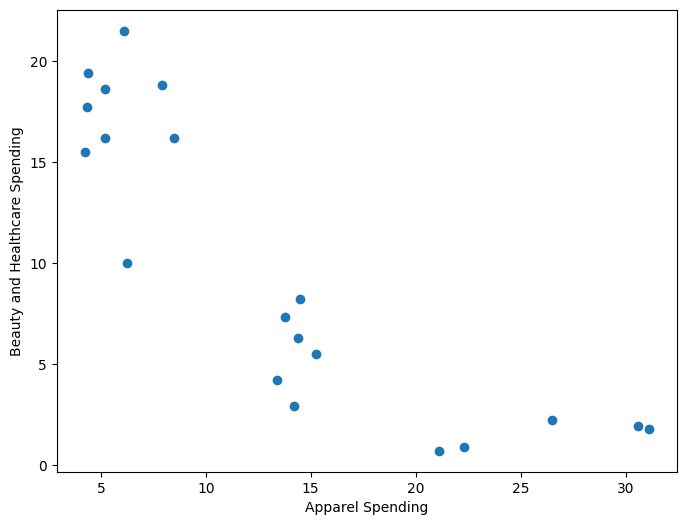

In [13]:
plt.figure(figsize=(8, 6))
plt.scatter(data_frame['Apparel'], data_frame['Beauty and Healthcare'])
plt.xlabel('Apparel Spending')
plt.ylabel('Beauty and Healthcare Spending')

## Q2

Text(0, 0.5, 'Normalized Beauty and Healthcare Spending')

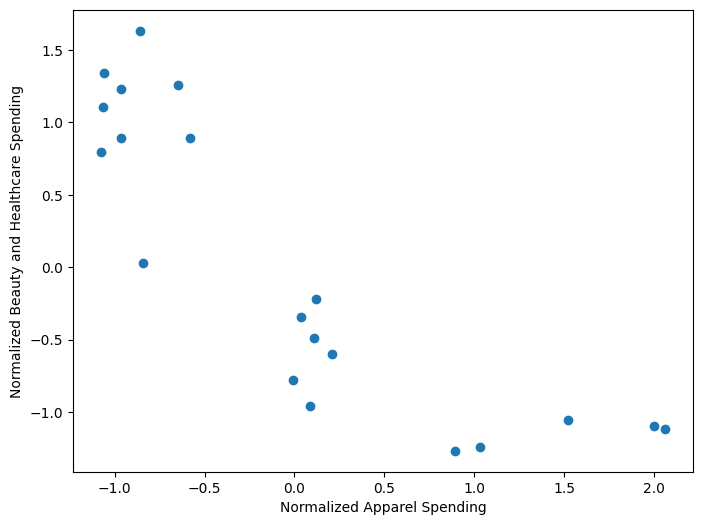

In [14]:
# standardizing the features
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data_frame[['Apparel', 'Beauty and Healthcare']])

plt.figure(figsize=(8, 6))
plt.scatter(scaled_data[:, 0], scaled_data[:, 1])
plt.xlabel('Normalized Apparel Spending')
plt.ylabel('Normalized Beauty and Healthcare Spending')

## Q3

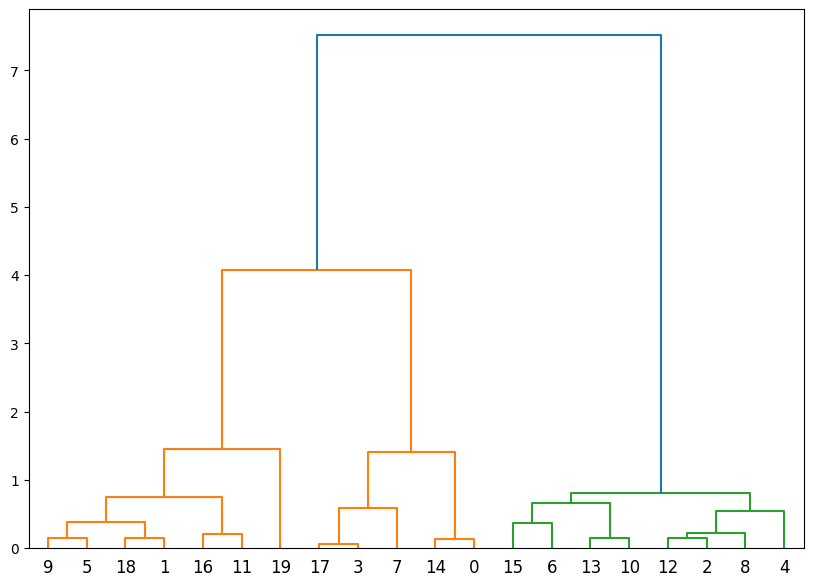

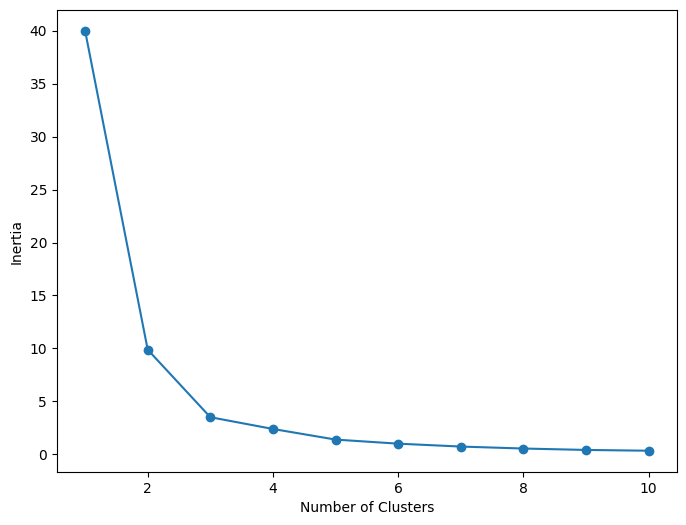

In [15]:
# dendrogram
linked = linkage(scaled_data, method='ward')
plt.figure(figsize=(10, 7))
dendrogram(linked, orientation='top', distance_sort='descending', show_leaf_counts=True)
plt.show()

# elbow method
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(scaled_data)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

## Q4
#### trying to form 3 clusters based on elbow method

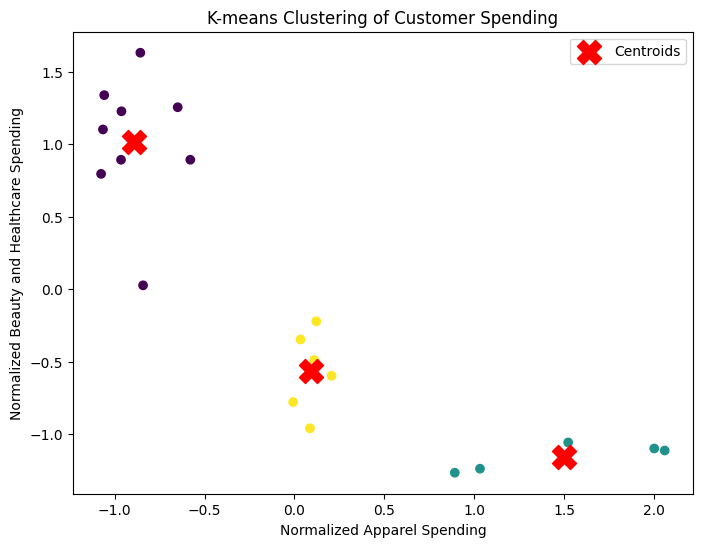

In [16]:

kmeans = KMeans(n_clusters=3, random_state=0)
data_frame['Cluster'] = kmeans.fit_predict(scaled_data)

# Scatter plot with clusters
plt.figure(figsize=(8, 6))
plt.scatter(scaled_data[:, 0], scaled_data[:, 1], c=data_frame['Cluster'], cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red', marker='X', label='Centroids')
plt.xlabel('Normalized Apparel Spending')
plt.ylabel('Normalized Beauty and Healthcare Spending')
plt.title('K-means Clustering of Customer Spending')
plt.legend()
plt.show()

## Q5

In [17]:
for cluster in range(kmeans.n_clusters):
    print(f"\nCustomers in Cluster {cluster}:")
    print(data_frame[data_frame['Cluster'] == cluster])
    print(f"\nCenter for Cluster {cluster}:")
    print(f"x:{kmeans.cluster_centers_[cluster][0]},y:{kmeans.cluster_centers_[cluster][1]}\n")


Customers in Cluster 0:
    Customer  Apparel  Beauty and Healthcare  Cluster
2          3     5.22                  18.60        0
4          5     6.12                  21.50        0
6          7     8.50                  16.20        0
8          9     4.34                  17.70        0
10        11     5.20                  16.20        0
12        13     4.40                  19.40        0
13        14     4.25                  15.50        0
15        16     7.90                  18.80        0
19        20     6.25                   9.98        0

Center for Cluster 0:
x:-0.8956687189279854,y:1.0189934915727956


Customers in Cluster 1:
    Customer  Apparel  Beauty and Healthcare  Cluster
0          1     21.1                    0.7        1
3          4     31.1                    1.8        1
7          8     26.5                    2.2        1
14        15     22.3                    0.9        1
17        18     30.6                    1.9        1

Center for Cluster